In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [4]:
df=pd.read_csv(r"Downloads/homeprices_banglore.csv")

In [6]:
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [32]:
df.value_counts().sum()

20

In [8]:
#preprocessing and scaling 
from sklearn import preprocessing

In [10]:
sx=preprocessing.MinMaxScaler()
sy=preprocessing.MinMaxScaler()

In [16]:
y=df['price']
X=df.drop('price',axis='columns')

,area,bedrooms
0,1056,2
1,2600,4
2,1440,3
3,1521,3
4,1200,2


In [18]:
y.head()

0     39.07
1    120.00
2     62.00
3     75.00
4     51.00
Name: price, dtype: float64

In [20]:
scaled_x=sx.fit_transform(X)

In [22]:
scaled_x

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [26]:
scaled_y=sy.fit_transform(y.values.reshape(df.shape[0],1))
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [28]:
scaled_y.reshape(20,)

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

In [34]:
np.random.permutation(20)

array([ 7, 14,  0,  4,  2,  3, 10,  9, 19, 18,  5,  1, 15, 11, 13,  6, 16,
       12,  8, 17])

In [110]:
def minibatch_grad(X,y_true,epochs,batch_size,learning_rate=0.1):
    number_of_features=X.shape[1]
    w=np.ones(shape=(number_of_features))
    b=0
    total_samples=X.shape[0]
    if batch_size > total_samples:
        batch_size=total_samples

    num_batches =int(total_samples/batch_size)
    
    cost_list=[]
    epoch_list=[]
    
    for i in range(epochs):
        random_indices=np.random.permutation(total_samples)
        X_tmp=X[random_indices]
        y_tmp=y_true[random_indices]
        for j in range(0,total_samples,batch_size):
            Xj=X_tmp[j:j+batch_size]
            yj=y_tmp[j:j+batch_size]
            y_predicted=np.dot(w,Xj.T)+b

            w_grad=-(2/len(Xj))*(Xj.T.dot(yj-y_predicted))
            b_grad = -(2/len(Xj))*np.sum(yj-y_predicted)

            w=w-learning_rate*w_grad
            b=b-learning_rate*b_grad

            cost=np.mean(np.square(yj-y_predicted)) 
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)

    return w,b,cost,cost_list,epoch_list

w,b,cost,cost_list,epoch_list=minibatch_grad(
    scaled_x,
    scaled_y.reshape(scaled_y.shape[0],),
    epochs=250,
    batch_size=5
)
w,b,cost

(array([0.84160557, 0.30337548]), -0.09695847201924576, 0.003889550369362488)

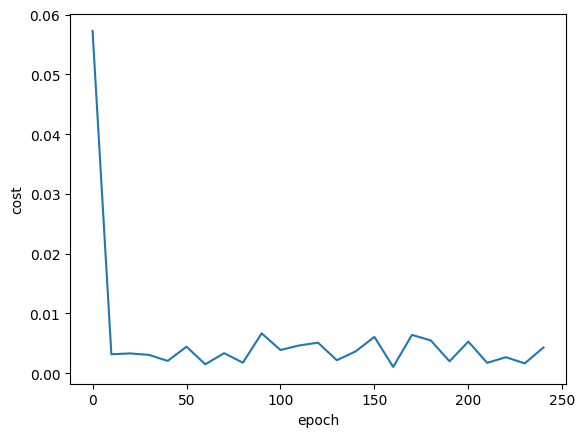

In [112]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [114]:
def predict(area,bedrooms,w,b):
    scaled_x = sx.transform([[area, bedrooms]])[0]
    # here w1 = w[0] , w2 = w[1], w3 = w[2] and bias is b
    # equation for price is w1*area + w2*bedrooms + w3*age + bias
    # scaled_X[0] is area
    # scaled_X[1] is bedrooms
    # scaled_X[2] is age
    scaled_price = w[0] * scaled_x[0] + w[1] * scaled_x[1] + b
    # once we get price prediction we need to to rescal it back to original value
    # also since it returns 2D array, to get single value we need to do value[0][0]
    return sy.inverse_transform([[scaled_price]])[0][0]

predict(2600,4,w,b)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


120.1481161010511

In [144]:
def minibatch_2(X,y_true,epochs,batch_size,learning_rate=0.001):
    #intialization
    number_of_features=X.shape[1]
    w=np.ones(shape=number_of_features)
    b=0
    #batch_size adjustment
    total_samples=X.shape[0]
    if batch_size>total_samples:
        batch_size=total_samples

    #number of batches
    num_batches=int(total_samples/batch_size)
    #tracking matrics
    cost_list=[]
    epoch_list=[]
    #training looop
    for i in range(epochs):
        #shuffling data
        random_indices=np.random.permutation(total_samples)
        X_tmp=X[random_indices]
        y_tmp=y_true[random_indices]
        #split data into Xj,yj for gradient computation
        for j in range(0,total_samples,batch_size):
            Xj=X_tmp[j:j+batch_size]
            yj=y_tmp[j:j+batch_size]
            #forwards pass 
            y_predicted=np.dot(w,Xj.T)+b
            #gradient computation
            w_grad=-(2/len(Xj))*(Xj.T.dot(yj-y_predicted))
            b_grad=-(2/len(Xj))*np.sum(yj-y_predicted)
            #parameter adjustmen 
            w=w-learning_rate*w_grad
            b=b-learning_rate*b_grad
            #cost calculation 
            cost=np.mean(np.square(yj-y_predicted))
            #logging materics
            if i%10==0:
                cost_list.append(cost)
                epoch_list.append(i)

    return w,b,cost,cost_list,epoch_list

In [146]:
w,b,cost,cost_list,epoch_list=minibatch_2(
    scaled_x,
    scaled_y.reshape(scaled_y.shape[0],),
    epochs=1200,
    batch_size=5
)
w,b,cost

(array([0.71040475, 0.67839824]), -0.23362674272201464, 0.016075137468627286)

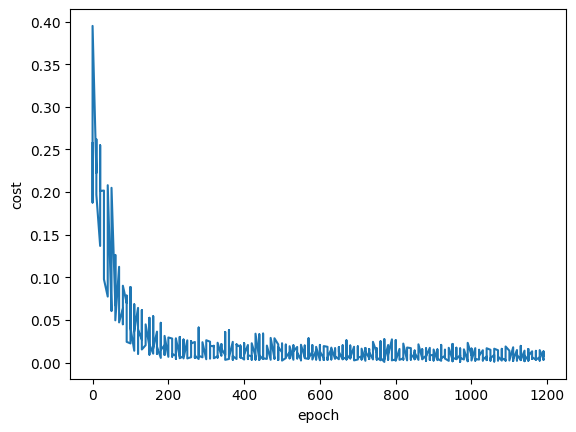

In [148]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [150]:
def predict(area,bedrooms,w,b):
    scaled_x = sx.transform([[area, bedrooms]])[0]
    # here w1 = w[0] , w2 = w[1], w3 = w[2] and bias is b
    # equation for price is w1*area + w2*bedrooms + w3*age + bias
    # scaled_X[0] is area
    # scaled_X[1] is bedrooms
    # scaled_X[2] is age
    scaled_price = w[0] * scaled_x[0] + w[1] * scaled_x[1] + b
    # once we get price prediction we need to to rescal it back to original value
    # also since it returns 2D array, to get single value we need to do value[0][0]
    return sy.inverse_transform([[scaled_price]])[0][0]

predict(2600,4,w,b)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.67523026445113

In [182]:
def minibatch_3(X,y_true,batch_size,epochs,learning_rate=0.01):
    #initialize 
    number_of_features=X.shape[1]
    w=np.ones(shape=number_of_features)
    b=0
    #batch size adjustement
    number_of_samples=X.shape[0]
    if batch_size>number_of_samples:
        batch_size=number_of_samples
    #number of batches
    num_batches=int(number_of_samples/batch_size)
    #tracking metrics
    cost_list=[]
    epoch_list=[]
    #training loop
    if i in range(epochs):
        #forward pass
        yhat=np.dot(w,Xj.T)+b
        #gradients 
        w_grad=-(2/len(Xj))*np.dot(Xj.t,(yj-yhat))
        b_grad=-(2/len(Xj))*np.sum(yj-yhat)
        #parameter adjustments 
        w=w-learning_rate*w_grad
        b=b-learning_rate*b_grad      
        #metrics logging
        cost=np.mean(np.square(y-yhat))
        #updatind lsits
        if i%50==0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w,b,cost,cost_list,epoch_list
    print(random_indices,X_tmp,y_tmp,number_of_batches,yhat,w_grad,b_grad,w,b,cost)


In [184]:
w,b,cost,cost_list,epoch_list=minibatch_2(
    scaled_x,
    scaled_y.reshape(scaled_y.shape[0]),
    5,
    1
)
w,b,cost

(array([0.96013485, 0.95100438]), -0.08363395686623358, 0.04187758585048798)

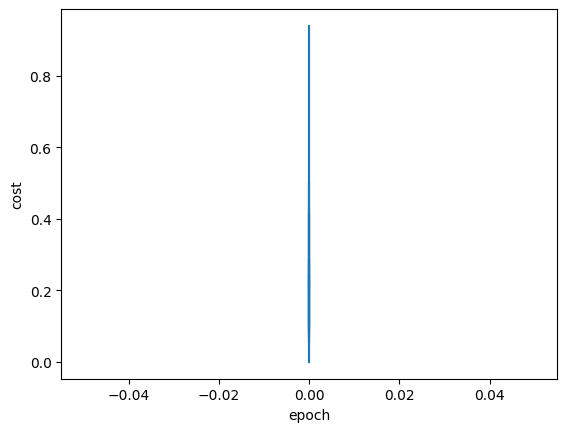

In [188]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [186]:
def predict(area,bedrooms,w,b):
    scaled_x = sx.transform([[area, bedrooms]])[0]
    # here w1 = w[0] , w2 = w[1], w3 = w[2] and bias is b
    # equation for price is w1*area + w2*bedrooms + w3*age + bias
    # scaled_X[0] is area
    # scaled_X[1] is bedrooms
    # scaled_X[2] is age
    scaled_price = w[0] * scaled_x[0] + w[1] * scaled_x[1] + b
    # once we get price prediction we need to to rescal it back to original value
    # also since it returns 2D array, to get single value we need to do value[0][0]
    return sy.inverse_transform([[scaled_price]])[0][0]

predict(2600,4,w,b)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


197.45128860159258

In [206]:
def gradient_descent(X,y_true,epochs,learning_rate=0.001):
    #initializ
    number_of_features=X.shape[1]
    w=np.ones(shape=number_of_features)
    b=0
    #tracking metrics
    epoch_list=[]
    cost_list=[]
    for i in range(epochs):
        yhat=np.dot(w,X.T)+b
        #gradient
        w_grad=-(2/len(X))*(X.T.dot(y_true-yhat))
        b_grad=-(2/len(X))*np.sum(y_true-yhat)
        #adjustment
        w=w-learning_rate*w_grad
        b=b-learning_rate*b_grad
        #metrics logging
        cost=np.mean(np.square(y_true-yhat))
        if i%50==0:
            cost_list.append(cost)
            epoch_list.append(i)

    return w,b,cost,cost_list,epoch_list

In [218]:
w,b,cost,cost_list,epoch_list=gradient_descent(
    scaled_x,
    scaled_y.reshape(scaled_y.shape[0]),
    10000
)
w,b,cost

(array([0.66475517, 0.60546292]), -0.17797042383006412, 0.004865057599444814)

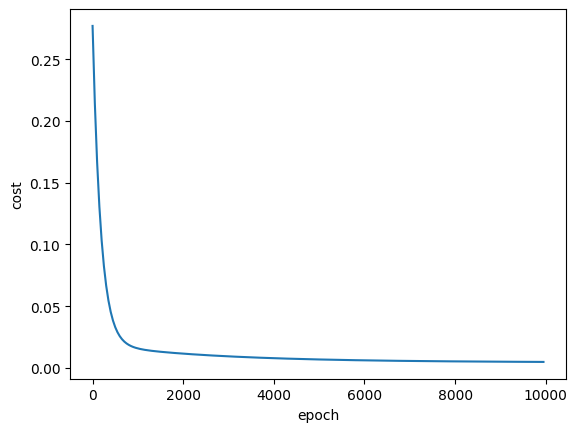

In [220]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [222]:
epoch_list

[0,
 50,
 100,
 150,
 200,
 250,
 300,
 350,
 400,
 450,
 500,
 550,
 600,
 650,
 700,
 750,
 800,
 850,
 900,
 950,
 1000,
 1050,
 1100,
 1150,
 1200,
 1250,
 1300,
 1350,
 1400,
 1450,
 1500,
 1550,
 1600,
 1650,
 1700,
 1750,
 1800,
 1850,
 1900,
 1950,
 2000,
 2050,
 2100,
 2150,
 2200,
 2250,
 2300,
 2350,
 2400,
 2450,
 2500,
 2550,
 2600,
 2650,
 2700,
 2750,
 2800,
 2850,
 2900,
 2950,
 3000,
 3050,
 3100,
 3150,
 3200,
 3250,
 3300,
 3350,
 3400,
 3450,
 3500,
 3550,
 3600,
 3650,
 3700,
 3750,
 3800,
 3850,
 3900,
 3950,
 4000,
 4050,
 4100,
 4150,
 4200,
 4250,
 4300,
 4350,
 4400,
 4450,
 4500,
 4550,
 4600,
 4650,
 4700,
 4750,
 4800,
 4850,
 4900,
 4950,
 5000,
 5050,
 5100,
 5150,
 5200,
 5250,
 5300,
 5350,
 5400,
 5450,
 5500,
 5550,
 5600,
 5650,
 5700,
 5750,
 5800,
 5850,
 5900,
 5950,
 6000,
 6050,
 6100,
 6150,
 6200,
 6250,
 6300,
 6350,
 6400,
 6450,
 6500,
 6550,
 6600,
 6650,
 6700,
 6750,
 6800,
 6850,
 6900,
 6950,
 7000,
 7050,
 7100,
 7150,
 7200,
 7250,
 